<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2021/22 Semester</h3></th>
    </tr>
</table>

In [17]:
# Import the Required Packages
import os
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import VGG16

from sklearn.metrics import confusion_matrix, classification_report

## Step 1: Data Loading

In [4]:
base_dir = os.getcwd()
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [5]:
img_size = 150

base_IDG = ImageDataGenerator(rescale=1./255)

train = base_IDG.flow_from_directory(
    train_dir, 
    target_size=(img_size, img_size),
    batch_size=75,
    class_mode='categorical')

validation = base_IDG.flow_from_directory(
    validation_dir, 
    target_size=(img_size, img_size),
    batch_size=50,
    class_mode='categorical')

test = base_IDG.flow_from_directory(
    test_dir, 
    target_size=(img_size, img_size),
    batch_size=50,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


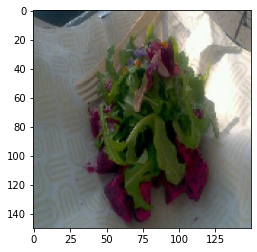

In [6]:
plt.imshow(train[0][0][0])

## Step 2:  Develop the Image Classification Models

### Model #1

In [6]:
#Base Model 1 - first base (1 conv relu max pool layer, input 20 dense relu, output 10 dense softmax)
bmodel1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

bmodel1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 20)                3504660   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 3,505,766
Trainable params: 3,505,766
Non-trainable params: 0
_________________________________________________________________


In [7]:
opt = optimizers.RMSprop(lr=0.001)
bmodel1.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['acc'])

bhistory1 = bmodel1.fit(
      train,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation,
      validation_steps=40)

Train for 100 steps, validate for 40 steps
Epoch 1/20
100/100 [==============================] - 32s 324ms/step - loss: 3.0802 - acc: 0.1351 - val_loss: 2.2355 - val_acc: 0.1650
Epoch 2/20
100/100 [==============================] - 29s 292ms/step - loss: 2.1726 - acc: 0.1824 - val_loss: 2.1873 - val_acc: 0.1810
Epoch 3/20
100/100 [==============================] - 29s 290ms/step - loss: 2.1097 - acc: 0.2213 - val_loss: 2.1076 - val_acc: 0.2045
Epoch 4/20
100/100 [==============================] - 29s 288ms/step - loss: 2.0029 - acc: 0.2715 - val_loss: 2.0219 - val_acc: 0.2825
Epoch 5/20
100/100 [==============================] - 29s 288ms/step - loss: 1.8205 - acc: 0.3581 - val_loss: 1.9859 - val_acc: 0.2850
Epoch 6/20
100/100 [==============================] - 29s 287ms/step - loss: 1.5911 - acc: 0.4503 - val_loss: 2.2066 - val_acc: 0.2625
Epoch 7/20
100/100 [==============================] - 29s 288ms/step - loss: 1.3527 - acc: 0.5507 - val_loss: 1.9856 - val_acc: 0.3260
Epoch 8/20
1

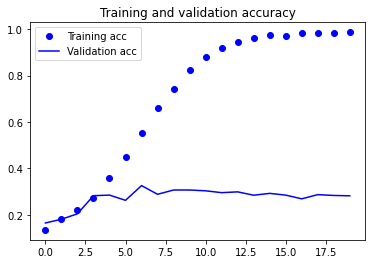

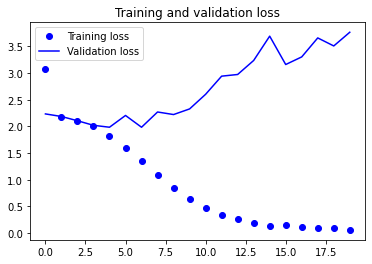

In [8]:
acc = bhistory1.history['acc']
val_acc = bhistory1.history['val_acc']
loss = bhistory1.history['loss']
val_loss = bhistory1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
#Base Model 2 - second base (2 conv relu max pool layer, input 20 dense relu, output 10 dense softmax)
bmodel2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

bmodel2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1658900   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [10]:
opt = optimizers.RMSprop(lr=0.001)
bmodel2.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['acc'])

history = bmodel2.fit(
      train,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation,
      validation_steps=40)

Train for 100 steps, validate for 40 steps
Epoch 1/30
100/100 [==============================] - 31s 308ms/step - loss: 2.3220 - acc: 0.1717 - val_loss: 2.1683 - val_acc: 0.2055
Epoch 2/30
100/100 [==============================] - 30s 298ms/step - loss: 1.9968 - acc: 0.2989 - val_loss: 1.9355 - val_acc: 0.3180
Epoch 3/30
100/100 [==============================] - 30s 298ms/step - loss: 1.7209 - acc: 0.4141 - val_loss: 1.7906 - val_acc: 0.4060
Epoch 4/30
100/100 [==============================] - 30s 298ms/step - loss: 1.4452 - acc: 0.5248 - val_loss: 1.8431 - val_acc: 0.3900
Epoch 5/30
100/100 [==============================] - 30s 299ms/step - loss: 1.1806 - acc: 0.6093 - val_loss: 2.0470 - val_acc: 0.3390
Epoch 6/30
100/100 [==============================] - 30s 300ms/step - loss: 0.9190 - acc: 0.7040 - val_loss: 2.2305 - val_acc: 0.3620
Epoch 7/30
100/100 [==============================] - 30s 300ms/step - loss: 0.6868 - acc: 0.7860 - val_loss: 2.3140 - val_acc: 0.3635
Epoch 8/30
1

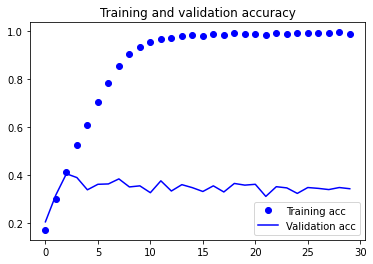

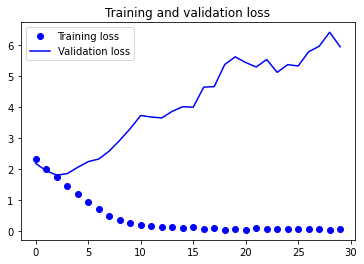

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
aug_IDG = ImageDataGenerator(rescale=1./255,
    rotation_range=50,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.3,
    zoom_range=0.25,
    horizontal_flip=True)

aug_train = aug_IDG.flow_from_directory(
    train_dir, 
    target_size=(img_size, img_size),
    batch_size=75,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.


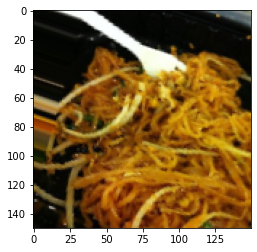

In [8]:
plt.imshow(aug_train[0][0][4])

In [14]:
#UBase Model 3 - data aug implement (2 conv relu max pool layer, input 32 dense relu, output 10 dense softmax)
bmodel3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

bmodel3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2654240   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [15]:
opt = optimizers.RMSprop(lr=0.001)
bmodel3.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['acc'])

bhistory3 = bmodel3.fit(
      aug_train,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation,
      validation_steps=40)

Train for 100 steps, validate for 40 steps
Epoch 1/50
100/100 [==============================] - 60s 603ms/step - loss: 2.4357 - acc: 0.1436 - val_loss: 2.1532 - val_acc: 0.2060
Epoch 2/50
100/100 [==============================] - 60s 602ms/step - loss: 2.1552 - acc: 0.2191 - val_loss: 2.0503 - val_acc: 0.2575
Epoch 3/50
100/100 [==============================] - 59s 593ms/step - loss: 2.0628 - acc: 0.2591 - val_loss: 1.9632 - val_acc: 0.2860
Epoch 4/50
100/100 [==============================] - 61s 615ms/step - loss: 2.0107 - acc: 0.2815 - val_loss: 1.8964 - val_acc: 0.3365
Epoch 5/50
100/100 [==============================] - 60s 596ms/step - loss: 1.9615 - acc: 0.3032 - val_loss: 1.9256 - val_acc: 0.3185
Epoch 6/50
100/100 [==============================] - 60s 604ms/step - loss: 1.8923 - acc: 0.3328 - val_loss: 1.8167 - val_acc: 0.3535
Epoch 7/50
100/100 [==============================] - 61s 606ms/step - loss: 1.8815 - acc: 0.3384 - val_loss: 1.9541 - val_acc: 0.3290
Epoch 8/50
1

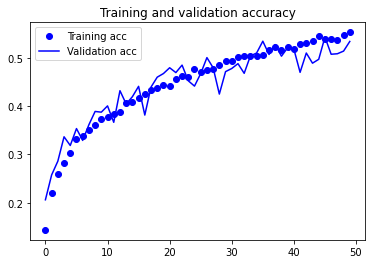

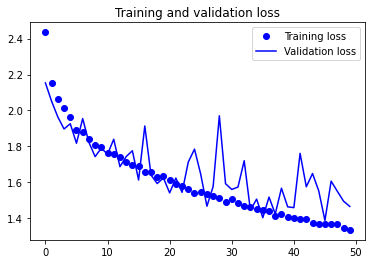

In [16]:
acc = bhistory3.history['acc']
val_acc = bhistory3.history['val_acc']
loss = bhistory3.history['loss']
val_loss = bhistory3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
#Model 1 Proto 1 - increased complexity (4 conv relu max pool layer, input 512 dense relu, hidden 128 dense relu,
                                            # output 10 dense softmax)
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 512)      

In [18]:
# Train the Model
opt = optimizers.RMSprop(lr=0.0001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['acc'])

history = model.fit(
      aug_train,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation,
      validation_steps=40)

Train for 100 steps, validate for 40 steps
Epoch 1/100
100/100 [==============================] - 63s 632ms/step - loss: 2.2031 - acc: 0.1736 - val_loss: 2.0937 - val_acc: 0.2200
Epoch 2/100
100/100 [==============================] - 61s 607ms/step - loss: 2.0660 - acc: 0.2519 - val_loss: 2.1402 - val_acc: 0.2440
Epoch 3/100
100/100 [==============================] - 61s 606ms/step - loss: 2.0032 - acc: 0.2852 - val_loss: 1.8893 - val_acc: 0.3195
Epoch 4/100
100/100 [==============================] - 61s 608ms/step - loss: 1.9340 - acc: 0.3155 - val_loss: 1.8180 - val_acc: 0.3655
Epoch 5/100
100/100 [==============================] - 61s 606ms/step - loss: 1.8689 - acc: 0.3479 - val_loss: 1.8210 - val_acc: 0.3545
Epoch 6/100
100/100 [==============================] - 61s 607ms/step - loss: 1.8202 - acc: 0.3617 - val_loss: 1.7926 - val_acc: 0.3645
Epoch 7/100
100/100 [==============================] - 61s 606ms/step - loss: 1.7877 - acc: 0.3740 - val_loss: 1.7514 - val_acc: 0.3770
Epoch

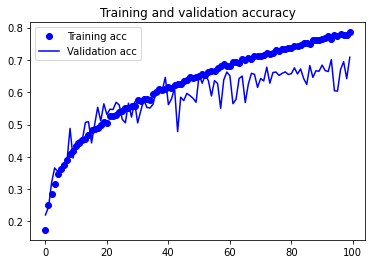

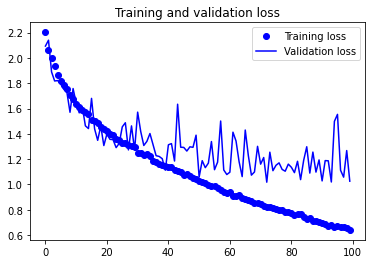

In [19]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
#Model 1 Proto 2 - conv stacking (4 (2-stacked)conv relu max pool layer, input 512 dense relu, hidden 128 dense relu,
                                            # output 10 dense softmax)
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 256)       2

In [8]:
# Train the Model
opt = optimizers.RMSprop(lr=0.0001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['acc'])

history = model.fit(
      aug_train,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation,
      validation_steps=40)

Train for 100 steps, validate for 40 steps
Epoch 1/100
100/100 [==============================] - 85s 854ms/step - loss: 2.2372 - acc: 0.1432 - val_loss: 2.1052 - val_acc: 0.2050
Epoch 2/100
100/100 [==============================] - 76s 757ms/step - loss: 2.1607 - acc: 0.1833 - val_loss: 2.2972 - val_acc: 0.1675
Epoch 3/100
100/100 [==============================] - 74s 741ms/step - loss: 2.1244 - acc: 0.2060 - val_loss: 2.0273 - val_acc: 0.2280
Epoch 4/100
100/100 [==============================] - 75s 753ms/step - loss: 2.0690 - acc: 0.2295 - val_loss: 2.1098 - val_acc: 0.2190
Epoch 5/100
100/100 [==============================] - 78s 782ms/step - loss: 2.0424 - acc: 0.2441 - val_loss: 1.9880 - val_acc: 0.2595
Epoch 6/100
100/100 [==============================] - 78s 782ms/step - loss: 2.0053 - acc: 0.2783 - val_loss: 2.4231 - val_acc: 0.2185
Epoch 7/100
100/100 [==============================] - 76s 761ms/step - loss: 1.9644 - acc: 0.2945 - val_loss: 2.0724 - val_acc: 0.2935
Epoch

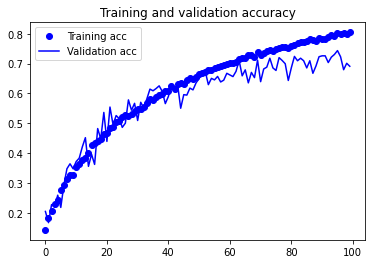

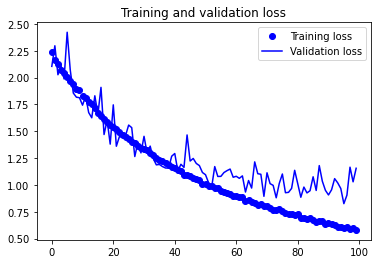

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
#Upscale Model Proto 3 - dropout implement (4 (2-stacked)conv relu max pool layer, input 512 dense relu, dropout(0.5),
                                            # hidden 128 dense relu, dropout(0.5), output 10 dense softmax)
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 146, 146, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 69, 69, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 256)      

In [11]:
opt = optimizers.RMSprop(lr=0.0001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['acc'])

history = model.fit(
      aug_train,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation,
      validation_steps=40)

Train for 100 steps, validate for 40 steps
Epoch 1/100
100/100 [==============================] - 82s 816ms/step - loss: 2.2805 - acc: 0.1211 - val_loss: 2.2893 - val_acc: 0.1615
Epoch 2/100
100/100 [==============================] - 80s 801ms/step - loss: 2.2018 - acc: 0.1657 - val_loss: 2.1236 - val_acc: 0.2050
Epoch 3/100
100/100 [==============================] - 80s 804ms/step - loss: 2.1664 - acc: 0.1927 - val_loss: 2.0904 - val_acc: 0.2185
Epoch 4/100
100/100 [==============================] - 80s 797ms/step - loss: 2.1325 - acc: 0.2004 - val_loss: 2.0172 - val_acc: 0.2370
Epoch 5/100
100/100 [==============================] - 80s 799ms/step - loss: 2.1131 - acc: 0.2123 - val_loss: 2.0026 - val_acc: 0.2590
Epoch 6/100
100/100 [==============================] - 80s 801ms/step - loss: 2.0905 - acc: 0.2308 - val_loss: 1.9706 - val_acc: 0.2765
Epoch 7/100
100/100 [==============================] - 80s 796ms/step - loss: 2.0616 - acc: 0.2321 - val_loss: 1.9411 - val_acc: 0.2865
Epoch

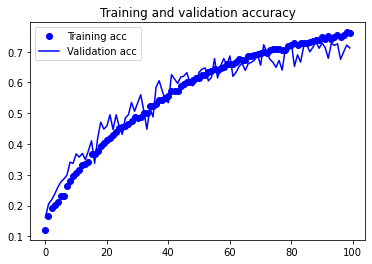

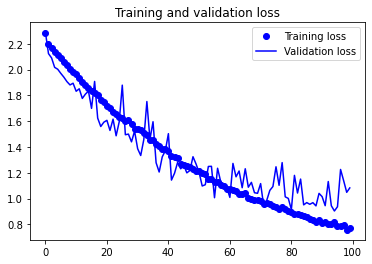

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
#Model 1 Prototype 4  - l2 regu implement (4 (2-stacked)conv relu max pool layer, input 512 dense relu, dropout(0.5),
                                            # hidden 128 dense relu, dropout(0.5), output 10 dense softmax)
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 146, 146, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 69, 69, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 256)      

In [14]:
opt = optimizers.RMSprop(lr=0.0001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['acc'])

history = model.fit(
      aug_train,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation,
      validation_steps=40)

Train for 100 steps, validate for 40 steps
Epoch 1/100
100/100 [==============================] - 79s 786ms/step - loss: 2.3584 - acc: 0.1312 - val_loss: 2.2231 - val_acc: 0.1915
Epoch 2/100
100/100 [==============================] - 75s 752ms/step - loss: 2.2511 - acc: 0.1716 - val_loss: 2.1565 - val_acc: 0.2185
Epoch 3/100
100/100 [==============================] - 77s 772ms/step - loss: 2.2066 - acc: 0.1879 - val_loss: 2.1371 - val_acc: 0.2280
Epoch 4/100
100/100 [==============================] - 76s 764ms/step - loss: 2.1836 - acc: 0.1939 - val_loss: 2.1407 - val_acc: 0.1925
Epoch 5/100
100/100 [==============================] - 76s 755ms/step - loss: 2.1579 - acc: 0.2075 - val_loss: 2.0512 - val_acc: 0.2580
Epoch 6/100
100/100 [==============================] - 76s 761ms/step - loss: 2.1267 - acc: 0.2197 - val_loss: 2.0225 - val_acc: 0.2780
Epoch 7/100
100/100 [==============================] - 76s 757ms/step - loss: 2.0926 - acc: 0.2348 - val_loss: 2.0528 - val_acc: 0.2530
Epoch

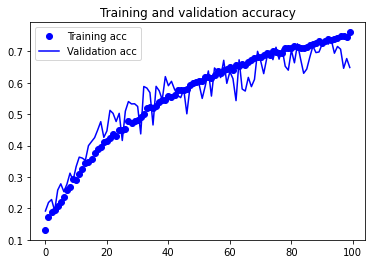

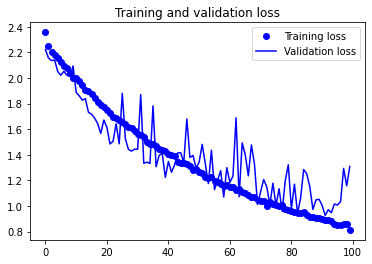

In [15]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
#Model 1 Prototype 5  - Adam opt trial (4 (2-stacked)conv relu max pool layer, input 512 dense relu, dropout(0.5),
                                            # hidden 128 dense relu, dropout(0.5), output 10 dense softmax)
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 146, 146, 64)      36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 69, 69, 128)       147584    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 256)      

In [17]:
opt = optimizers.Adam(lr=0.0001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['acc'])

history = model.fit(
      aug_train,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation,
      validation_steps=40)

Train for 100 steps, validate for 40 steps
Epoch 1/100
100/100 [==============================] - 77s 769ms/step - loss: 2.3902 - acc: 0.1136 - val_loss: 2.3235 - val_acc: 0.1395
Epoch 2/100
100/100 [==============================] - 74s 736ms/step - loss: 2.2877 - acc: 0.1713 - val_loss: 2.1818 - val_acc: 0.1910
Epoch 3/100
100/100 [==============================] - 73s 734ms/step - loss: 2.2121 - acc: 0.1880 - val_loss: 2.1207 - val_acc: 0.2065
Epoch 4/100
100/100 [==============================] - 73s 734ms/step - loss: 2.1611 - acc: 0.2001 - val_loss: 2.0674 - val_acc: 0.2245
Epoch 5/100
100/100 [==============================] - 73s 733ms/step - loss: 2.1363 - acc: 0.2071 - val_loss: 2.1018 - val_acc: 0.2360
Epoch 6/100
100/100 [==============================] - 73s 735ms/step - loss: 2.1065 - acc: 0.2300 - val_loss: 2.0677 - val_acc: 0.2365
Epoch 7/100
100/100 [==============================] - 73s 731ms/step - loss: 2.0883 - acc: 0.2344 - val_loss: 1.9612 - val_acc: 0.2945
Epoch

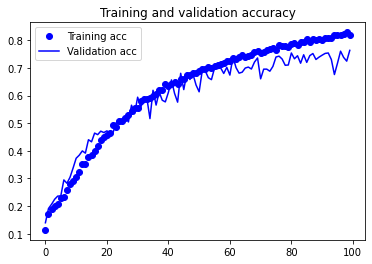

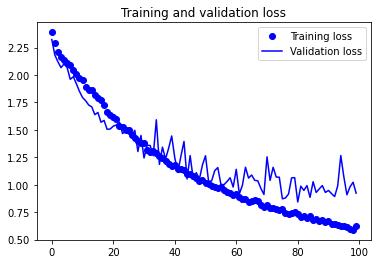

In [18]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
#Final Model 1 – Early Stopping at epoch 60 (4 (2-stacked)conv relu max pool layer, input 512 dense relu, dropout(0.5),
                                            # hidden 128 dense relu, dropout(0.5), output 10 dense softmax
                                            # optimizer Adam, Early Stopping 60 epoch)
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 146, 146, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 69, 69, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 256)      

In [19]:
opt = optimizers.Adam(lr=0.0001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['acc'])

history = model.fit(
      aug_train,
      steps_per_epoch=100,
      epochs=60,
      validation_data=validation,
      validation_steps=40)

Train for 100 steps, validate for 40 steps
Epoch 1/60
100/100 [==============================] - 75s 755ms/step - loss: 2.3914 - acc: 0.1107 - val_loss: 2.3190 - val_acc: 0.1550
Epoch 2/60
100/100 [==============================] - 75s 750ms/step - loss: 2.2721 - acc: 0.1637 - val_loss: 2.1748 - val_acc: 0.1745
Epoch 3/60
100/100 [==============================] - 74s 743ms/step - loss: 2.2204 - acc: 0.1708 - val_loss: 2.1412 - val_acc: 0.1845
Epoch 4/60
100/100 [==============================] - 74s 736ms/step - loss: 2.1916 - acc: 0.1764 - val_loss: 2.1750 - val_acc: 0.1920
Epoch 5/60
100/100 [==============================] - 74s 739ms/step - loss: 2.1499 - acc: 0.2044 - val_loss: 2.0850 - val_acc: 0.2310
Epoch 6/60
100/100 [==============================] - 74s 738ms/step - loss: 2.1157 - acc: 0.2180 - val_loss: 2.0232 - val_acc: 0.2470
Epoch 7/60
100/100 [==============================] - 74s 742ms/step - loss: 2.0826 - acc: 0.2343 - val_loss: 1.9892 - val_acc: 0.2650
Epoch 8/60
1

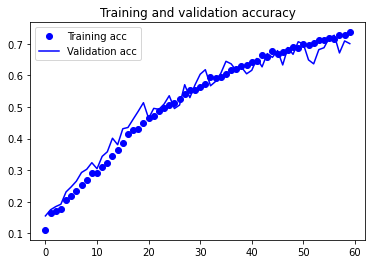

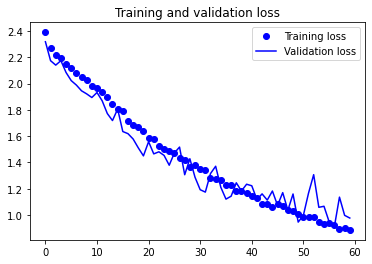

In [20]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
# Save the Model
model.save('food_model_1.h5')

### Model #2

In [9]:
#VGG16 - Base
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [8]:
#VGG16 – Feature Extraction with Data Augmentation
model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 18,976,458
Trainable params: 18,976,458
Non-trainable params: 0
_________________________________________________________________


In [9]:
conv_base.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 18,976,458
Trainable params: 4,261,770
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
opt = optimizers.RMSprop(lr=0.0001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['acc'])

history = model.fit(
      aug_train,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation,
      validation_steps=40)

Train for 100 steps, validate for 40 steps
Epoch 1/30
100/100 [==============================] - 72s 724ms/step - loss: 1.9158 - acc: 0.3193 - val_loss: 1.6023 - val_acc: 0.4565
Epoch 2/30
100/100 [==============================] - 66s 661ms/step - loss: 1.5938 - acc: 0.4487 - val_loss: 1.4470 - val_acc: 0.5280
Epoch 3/30
100/100 [==============================] - 66s 661ms/step - loss: 1.4687 - acc: 0.4929 - val_loss: 1.2997 - val_acc: 0.5690
Epoch 4/30
100/100 [==============================] - 66s 660ms/step - loss: 1.4101 - acc: 0.5108 - val_loss: 1.2384 - val_acc: 0.5855
Epoch 5/30
100/100 [==============================] - 66s 661ms/step - loss: 1.3693 - acc: 0.5247 - val_loss: 1.2193 - val_acc: 0.5945
Epoch 6/30
100/100 [==============================] - 66s 660ms/step - loss: 1.3365 - acc: 0.5371 - val_loss: 1.2369 - val_acc: 0.5780
Epoch 7/30
100/100 [==============================] - 67s 668ms/step - loss: 1.2910 - acc: 0.5591 - val_loss: 1.1392 - val_acc: 0.6235
Epoch 8/30
1

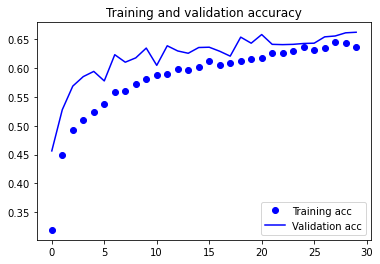

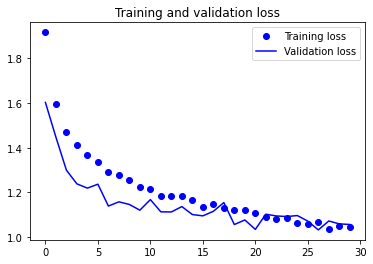

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
#VGG16 – Fine Tuning
model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 18,976,458
Trainable params: 4,261,770
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 18,976,458
Trainable params: 11,341,194
Non-trainable params: 7,635,264
_________________________________________________________________


In [14]:
opt = optimizers.RMSprop(lr=0.0001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['acc'])

history = model.fit(
      aug_train,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation,
      validation_steps=40)

Train for 100 steps, validate for 40 steps
Epoch 1/50
100/100 [==============================] - 69s 688ms/step - loss: 1.7286 - acc: 0.3945 - val_loss: 1.2833 - val_acc: 0.5560
Epoch 2/50
100/100 [==============================] - 67s 673ms/step - loss: 1.2896 - acc: 0.5719 - val_loss: 1.0339 - val_acc: 0.6520
Epoch 3/50
100/100 [==============================] - 68s 679ms/step - loss: 1.1186 - acc: 0.6284 - val_loss: 0.9647 - val_acc: 0.6820
Epoch 4/50
100/100 [==============================] - 69s 695ms/step - loss: 1.0141 - acc: 0.6620 - val_loss: 0.9770 - val_acc: 0.6860
Epoch 5/50
100/100 [==============================] - 67s 675ms/step - loss: 0.9503 - acc: 0.6797 - val_loss: 0.8513 - val_acc: 0.7270
Epoch 6/50
100/100 [==============================] - 67s 674ms/step - loss: 0.8822 - acc: 0.7021 - val_loss: 0.9294 - val_acc: 0.7165
Epoch 7/50
100/100 [==============================] - 67s 673ms/step - loss: 0.8310 - acc: 0.7236 - val_loss: 0.8235 - val_acc: 0.7395
Epoch 8/50
1

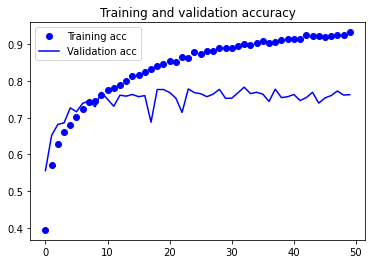

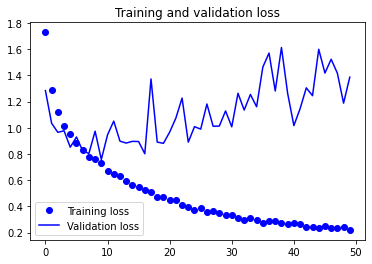

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
#VGG16 – Fine Tuning with Regularization Techniques
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [8]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [9]:
opt = optimizers.RMSprop(lr=0.0001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['acc'])

history = model.fit(
      aug_train,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation,
      validation_steps=40)

Train for 100 steps, validate for 40 steps
Epoch 1/100
100/100 [==============================] - 75s 753ms/step - loss: 2.2533 - acc: 0.2204 - val_loss: 1.7825 - val_acc: 0.4480
Epoch 2/100
100/100 [==============================] - 69s 691ms/step - loss: 1.8509 - acc: 0.3760 - val_loss: 1.4099 - val_acc: 0.5655
Epoch 3/100
100/100 [==============================] - 69s 689ms/step - loss: 1.6127 - acc: 0.4737 - val_loss: 1.2750 - val_acc: 0.6155
Epoch 4/100
100/100 [==============================] - 69s 686ms/step - loss: 1.4571 - acc: 0.5404 - val_loss: 1.3278 - val_acc: 0.6175
Epoch 5/100
100/100 [==============================] - 69s 685ms/step - loss: 1.3219 - acc: 0.5979 - val_loss: 1.1204 - val_acc: 0.6840
Epoch 6/100
100/100 [==============================] - 69s 685ms/step - loss: 1.2462 - acc: 0.6252 - val_loss: 1.0995 - val_acc: 0.6765
Epoch 7/100
100/100 [==============================] - 69s 687ms/step - loss: 1.2083 - acc: 0.6465 - val_loss: 1.0784 - val_acc: 0.6945
Epoch

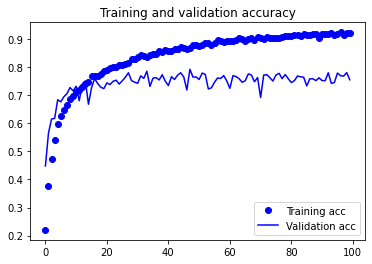

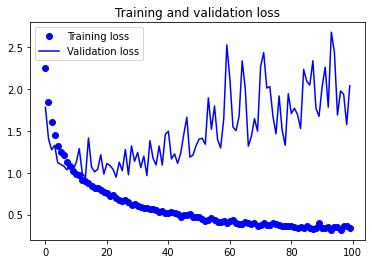

In [10]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
#DenseNet121 – Base
from tensorflow.keras.applications import DenseNet121
conv_base_dnet = DenseNet121(weights='imagenet',
                    include_top=False,
                    input_shape=(img_size, img_size, 3))

conv_base_dnet.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 156, 156, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 75, 75, 64)   9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [20]:
#DenseNet121 – Fine Tuning with Regularization Techniques
model = models.Sequential([
    conv_base_dnet,
    layers.Flatten(),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 4, 4, 1024)        7037504   
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               8389120   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [23]:
conv_base_dnet.trainable = True
set_trainable = False
for layer in conv_base_dnet.layers:
    if layer.name == 'conv5_block16_0_bn':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 4, 4, 1024)        7037504   
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               8389120   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [24]:
opt = optimizers.RMSprop(lr=0.0001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['acc'])

history = model.fit(aug_train,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation,
      validation_steps=40)

Train for 100 steps, validate for 40 steps
Epoch 1/100
100/100 [==============================] - 81s 810ms/step - loss: 2.5735 - acc: 0.1915 - val_loss: 1.7281 - val_acc: 0.4590
Epoch 2/100
100/100 [==============================] - 70s 703ms/step - loss: 2.0684 - acc: 0.3157 - val_loss: 1.4434 - val_acc: 0.5505
Epoch 3/100
100/100 [==============================] - 69s 687ms/step - loss: 1.8032 - acc: 0.4168 - val_loss: 1.3660 - val_acc: 0.6055
Epoch 4/100
100/100 [==============================] - 64s 641ms/step - loss: 1.6553 - acc: 0.4703 - val_loss: 1.4127 - val_acc: 0.5810
Epoch 5/100
100/100 [==============================] - 64s 636ms/step - loss: 1.5276 - acc: 0.5147 - val_loss: 1.4313 - val_acc: 0.6145
Epoch 6/100
100/100 [==============================] - 64s 636ms/step - loss: 1.4303 - acc: 0.5567 - val_loss: 1.4594 - val_acc: 0.6220
Epoch 7/100
100/100 [==============================] - 64s 637ms/step - loss: 1.3722 - acc: 0.5773 - val_loss: 1.4346 - val_acc: 0.6310
Epoch

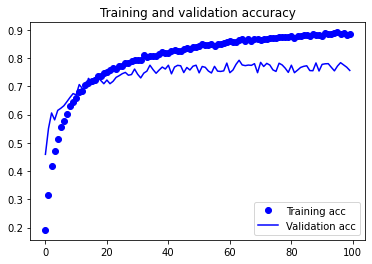

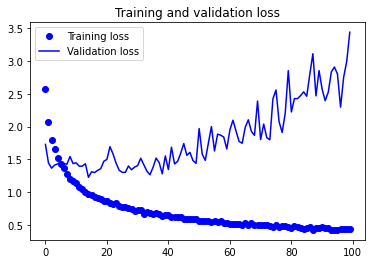

In [25]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
#DenseNet121 – Adam Optimizer
conv_base_dnet = DenseNet121(weights='imagenet',
                    include_top=False,
                    input_shape=(img_size, img_size, 3))

model = models.Sequential([
    conv_base_dnet,
    layers.Flatten(),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 4, 4, 1024)        7037504   
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               8389120   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [30]:
conv_base_dnet.trainable = True
set_trainable = False
for layer in conv_base_dnet.layers:
    if layer.name == 'conv5_block16_0_bn':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 4, 4, 1024)        7037504   
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               8389120   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [31]:
opt = optimizers.Adam(lr=0.0001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['acc'])

history = model.fit(aug_train,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation,
      validation_steps=40)

Train for 100 steps, validate for 40 steps
Epoch 1/50
100/100 [==============================] - 73s 726ms/step - loss: 2.6169 - acc: 0.1787 - val_loss: 1.8409 - val_acc: 0.4330
Epoch 2/50
100/100 [==============================] - 64s 639ms/step - loss: 2.0979 - acc: 0.3013 - val_loss: 1.4361 - val_acc: 0.5545
Epoch 3/50
100/100 [==============================] - 64s 639ms/step - loss: 1.8465 - acc: 0.4016 - val_loss: 1.5518 - val_acc: 0.5305
Epoch 4/50
100/100 [==============================] - 64s 636ms/step - loss: 1.6749 - acc: 0.4591 - val_loss: 1.4025 - val_acc: 0.5845
Epoch 5/50
100/100 [==============================] - 65s 654ms/step - loss: 1.5439 - acc: 0.5125 - val_loss: 1.3085 - val_acc: 0.6265
Epoch 6/50
100/100 [==============================] - 64s 639ms/step - loss: 1.4509 - acc: 0.5483 - val_loss: 1.3382 - val_acc: 0.6510
Epoch 7/50
100/100 [==============================] - 64s 643ms/step - loss: 1.3740 - acc: 0.5757 - val_loss: 1.3053 - val_acc: 0.6530
Epoch 8/50
1

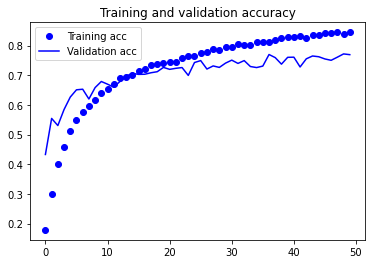

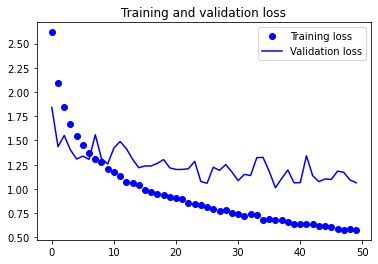

In [32]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [62]:
#Model 2 – DenseNet121 Early Stopping at Epoch 20
conv_base_dnet = DenseNet121(weights='imagenet',
                    include_top=False,
                    input_shape=(img_size, img_size, 3))

model = models.Sequential([
    conv_base_dnet,
    layers.Flatten(),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

conv_base_dnet.trainable = True
set_trainable = False
for layer in conv_base_dnet.layers:
    if layer.name == 'conv5_block16_0_bn':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

opt = optimizers.Adam(lr=0.0001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['acc'])

history = model.fit(aug_train,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation,
      validation_steps=40)

Train for 100 steps, validate for 40 steps
Epoch 1/20
100/100 [==============================] - 73s 730ms/step - loss: 2.6392 - acc: 0.1816 - val_loss: 1.8787 - val_acc: 0.3940
Epoch 2/20
100/100 [==============================] - 65s 652ms/step - loss: 2.0751 - acc: 0.3119 - val_loss: 1.4270 - val_acc: 0.5490
Epoch 3/20
100/100 [==============================] - 66s 656ms/step - loss: 1.8272 - acc: 0.4011 - val_loss: 1.2591 - val_acc: 0.6200
Epoch 4/20
100/100 [==============================] - 65s 654ms/step - loss: 1.6649 - acc: 0.4624 - val_loss: 1.1806 - val_acc: 0.6585
Epoch 5/20
100/100 [==============================] - 65s 653ms/step - loss: 1.5428 - acc: 0.5068 - val_loss: 1.2882 - val_acc: 0.6350
Epoch 6/20
100/100 [==============================] - 66s 655ms/step - loss: 1.4461 - acc: 0.5531 - val_loss: 1.2336 - val_acc: 0.6655
Epoch 7/20
100/100 [==============================] - 65s 653ms/step - loss: 1.3567 - acc: 0.5831 - val_loss: 1.4293 - val_acc: 0.6250
Epoch 8/20
1

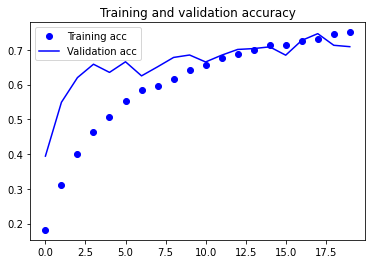

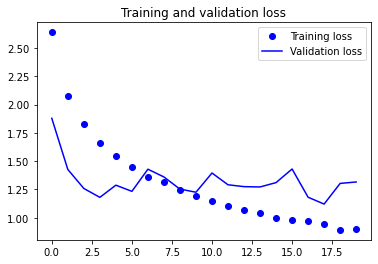

In [63]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [65]:
# Save the Model
model.save('food_model_2.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [55]:
# Model #1
model1 = models.load_model('food_model_1.h5')
test_loss, test_acc = model1.evaluate(test)
print(test_acc)

10/10 [==============================] - 2s 234ms/step - loss: 0.9561 - acc: 0.7100
0.71


('beet_salad',
 'carrot_cake',
 'chicken_quesadilla',
 'french_toast',
 'garlic_bread',
 'lobster_roll_sandwich',
 'mussels',
 'pad_thai',
 'peking_duck',
 'tuna_tartare')

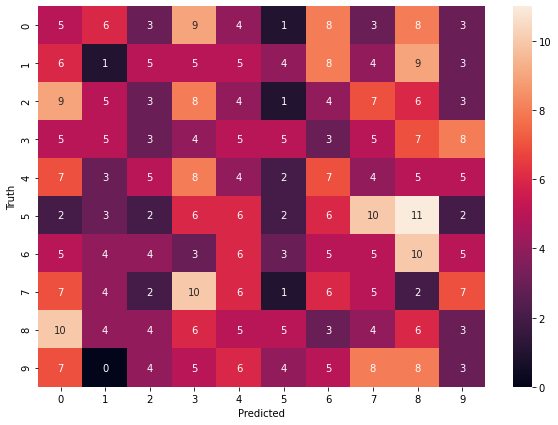

In [56]:
y_predicted = model1.predict(test)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_test = test.classes
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

'beet_salad', 'carrot_cake', 'chicken_quesadilla', 'french_toast', 'garlic_bread', 'lobster_roll_sandwich', 'mussels', 'pad_thai', 'peking_duck', 'tuna_tartare'

In [57]:
class_labels = list(test.class_indices.keys()) 
report = classification_report(y_test, y_predicted_labels, target_names=class_labels)
print(report)    

                       precision    recall  f1-score   support

           beet_salad       0.08      0.10      0.09        50
          carrot_cake       0.03      0.02      0.02        50
   chicken_quesadilla       0.09      0.06      0.07        50
         french_toast       0.06      0.08      0.07        50
         garlic_bread       0.08      0.08      0.08        50
lobster_roll_sandwich       0.07      0.04      0.05        50
              mussels       0.09      0.10      0.10        50
             pad_thai       0.09      0.10      0.10        50
          peking_duck       0.08      0.12      0.10        50
         tuna_tartare       0.07      0.06      0.07        50

             accuracy                           0.08       500
            macro avg       0.07      0.08      0.07       500
         weighted avg       0.07      0.08      0.07       500



In [66]:
# Model #2
model2 = models.load_model('food_model_2.h5')
test_loss, test_acc = model2.evaluate(test)
print(test_acc)

10/10 [==============================] - 4s 415ms/step - loss: 1.3138 - acc: 0.7420
0.742


('beet_salad',
 'carrot_cake',
 'chicken_quesadilla',
 'french_toast',
 'garlic_bread',
 'lobster_roll_sandwich',
 'mussels',
 'pad_thai',
 'peking_duck',
 'tuna_tartare')

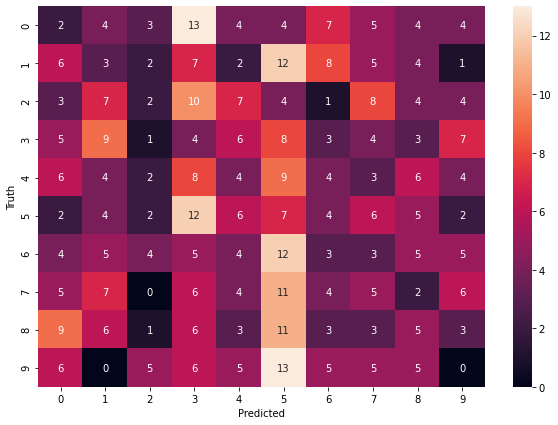

In [67]:
y_predicted = model.predict(test)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_test = test.classes
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

'beet_salad', 'carrot_cake', 'chicken_quesadilla', 'french_toast', 'garlic_bread', 'lobster_roll_sandwich', 'mussels', 'pad_thai', 'peking_duck', 'tuna_tartare'

In [68]:
class_labels = list(test.class_indices.keys()) 
report = classification_report(y_test, y_predicted_labels, target_names=class_labels)
print(report)  

                       precision    recall  f1-score   support

           beet_salad       0.04      0.04      0.04        50
          carrot_cake       0.06      0.06      0.06        50
   chicken_quesadilla       0.09      0.04      0.06        50
         french_toast       0.05      0.08      0.06        50
         garlic_bread       0.09      0.08      0.08        50
lobster_roll_sandwich       0.08      0.14      0.10        50
              mussels       0.07      0.06      0.07        50
             pad_thai       0.11      0.10      0.10        50
          peking_duck       0.12      0.10      0.11        50
         tuna_tartare       0.00      0.00      0.00        50

             accuracy                           0.07       500
            macro avg       0.07      0.07      0.07       500
         weighted avg       0.07      0.07      0.07       500



In [77]:
# Save the best model
model = model1

model.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [78]:
# Load the model
best_model = models.load_model('food_model_best.h5')

In [79]:
# Load the food list (in alphabetical order)
with open('61.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['beet_salad', 'carrot_cake', 'chicken_quesadilla', 'french_toast', 'garlic_bread', 'lobster_roll_sandwich', 'mussels', 'pad_thai', 'peking_duck', 'tuna_tartare']


In [80]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

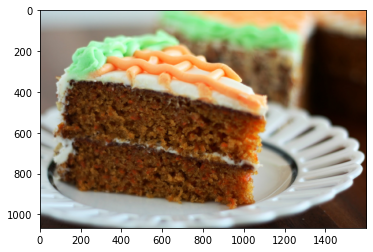

The prediction is:  carrot_cake 

      beet_salad  carrot_cake  chicken_quesadilla  french_toast  garlic_bread  \
0  2.371409e-13          1.0        7.346777e-09  1.331991e-07  1.970672e-08   

   lobster_roll_sandwich       mussels      pad_thai   peking_duck  \
0           2.256016e-11  1.290531e-09  3.331693e-09  9.601584e-08   

   tuna_tartare  
0  1.200506e-11  


In [81]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'carrot_cake.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

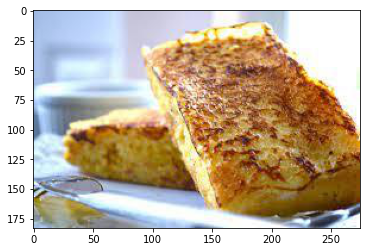

The prediction is:  french_toast 

    beet_salad  carrot_cake  chicken_quesadilla  french_toast  garlic_bread  \
0    0.000016     0.010961            0.001919      0.754019      0.230761   

   lobster_roll_sandwich   mussels  pad_thai  peking_duck  tuna_tartare  
0                0.00083  0.000012  0.000551      0.00072      0.000211  


In [82]:
img = 'french_toast.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

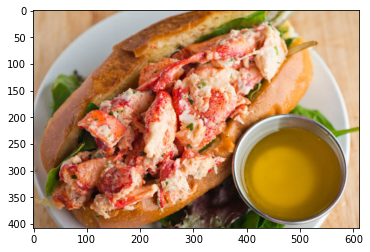

The prediction is:  lobster_roll_sandwich 

    beet_salad  carrot_cake  chicken_quesadilla  french_toast  garlic_bread  \
0    0.000016     0.000018            0.009785      0.000043      0.000391   

   lobster_roll_sandwich   mussels  pad_thai  peking_duck  tuna_tartare  
0               0.988794  0.000008  0.000134     0.000023      0.000789  


In [83]:
img = 'lobster_roll.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)